In [7]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [1, 1], 
    [2, 1],
    [1.5, 0],
    [3, 2],
])

Y = np.array([
    [1],
    [1],
    [0],
    [2],
])


phi = np.array([
    [1, 1, 1],
    [4, 2, 1],
    [2.25, 1.5, 1],
    [9, 3, 1],
])

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(Y)
print(w)

[[ 0.81818182]
 [-2.64545455]
 [ 2.63636364]]


In [8]:
x = np.reshape(np.arange(0, 5, 0.1), (50, 1))
phi2 = np.hstack((x*x*x, x, np.ones((50, 1))))
yhat = phi2.dot(w)


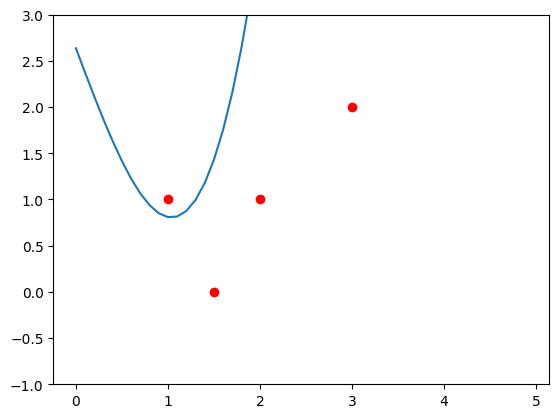

In [10]:
plt.scatter(X[:,0], Y, color='red')
plt.plot(x, yhat)
plt.ylim(-1, 3)
plt.show()

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.array([[0,1], [2,0], [1,2]])
poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)
print(phi)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 0. 4. 0. 0.]
 [1. 1. 2. 1. 2. 4.]]


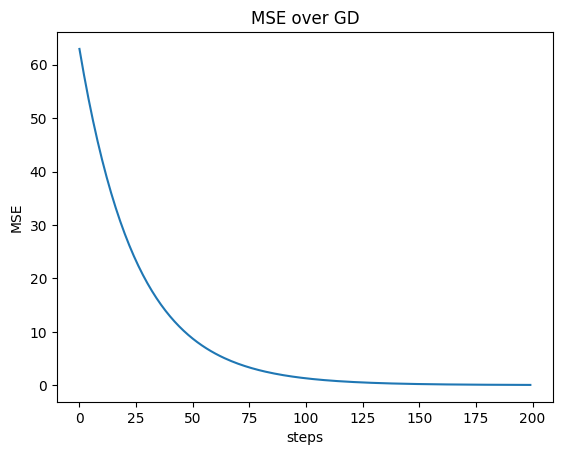

In [20]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
import sys


predictions_scaled = genfromtxt('../data/stock_prediction_data_scaled.csv', delimiter=',')
predictions = genfromtxt('../data/stock_prediction_data.csv', delimiter=',')
prices = genfromtxt('../data/stock_price.csv', delimiter=',')

np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

predictions = preprocessing.scale(predictions)
n = predictions.shape[0]
η = 0.01

prices = np.reshape(prices, (n, 1))
Ⅱ = ones((n,1))	
Φ = np.hstack((predictions,Ⅱ))
d = Φ.shape[1]
w = randn(d,1)

def f(w):
	fₒ = 0						
	for ϕᵢ, pricesᵢ in zip(Φ,prices):
		ϕᵢ = np.reshape(ϕᵢ, (d,1))		
		fₒ += (w.T.dot(ϕᵢ) - pricesᵢ)**2
	return ((1/n)*fₒ).item()	
#	


def ᐁf(w):
	advanced_approach = False
	if advanced_approach:
		return (2/n)*Φ.T.dot(Φ.dot(w) - prices) # derivative in compact matrix form
	else:
		grads = np.zeros((d, 1))	
		for ϕᵢ,pricesᵢ in zip(Φ,prices):	# loop through both x and y each sample
			ϕᵢ = np.reshape(ϕᵢ, (d,1)) # make sure it is in column format
			grads += (w.T.dot(ϕᵢ) - pricesᵢ)*ϕᵢ
	return (2/n)*grads


mse_list = []
for i in range(200):
	w = w - η*ᐁf(w)				# gradient descent update w
	mse_list.append(f(w))



plt.plot(mse_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 						# Display the plot
